# Абуховский Иван, ИУ5-61Б
## РК1 по ТМО 

### Для выполнения задачи проведения корреляционного анализа данных был представлен набор данных sklearn iris dataset

In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris.data.shape

(150, 4)

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Создадим датафрейм

In [6]:
idf = pd.DataFrame(iris.data, columns = iris.feature_names)
idf.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
idf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


### Все поля - числовые
### Проверим наличие пропусков

In [8]:
idf.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

### Следовательно, пропуски отсутствуют
### Построим диаграмму рассеяния для колонок sepal width и petal width

<AxesSubplot:xlabel='sepal width (cm)', ylabel='petal width (cm)'>

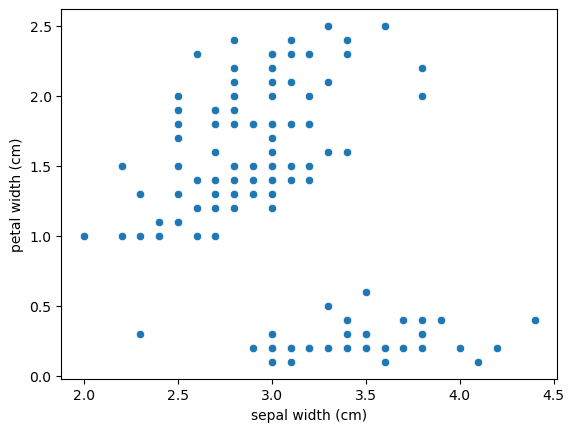

In [11]:
sns.scatterplot(data=idf, x="sepal width (cm)", y="petal width (cm)")

### Для визуализации корелляционной матрицы построим тепловую карту

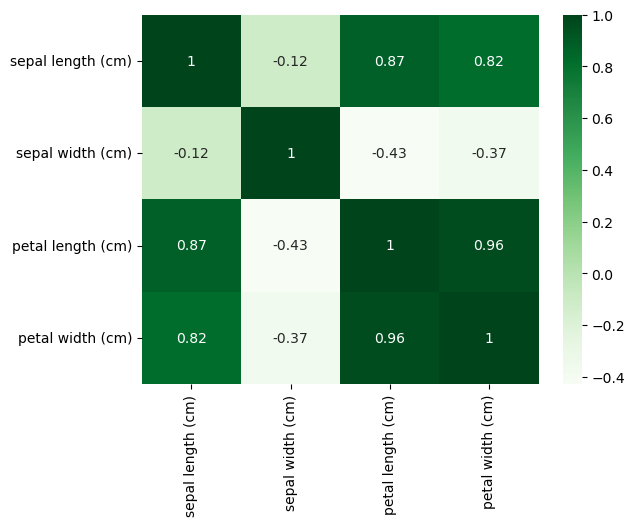

In [14]:
dataplot = sns.heatmap(idf.corr(), cmap = "Greens", annot = True)

### Наибольшую зависимость можно наблюдать между столбцами "Наиболее сильную зависимость можно заметить между переменными "petal length (cm)" и "petal width (cm)", а также между "sepal length (cm)" и "petal length (cm)" и "sepal length (cm)" и "petal width (cm)". Эти признаки будут наиболее информативными при построении моделей машинного обучения.  
## Таким образом, на основе признаков "petal length (cm)", "petal width (cm)", "sepal length (cm)" могут быть построены модели машинного обучения.  

## Так как в представленном датасете не были обнаружены пропуски, возьмем дополнительный датасет, содержащий пропуски.  

### Для этого был взят набор данных со статистикой киберспортивных команд из Overwatch League

In [15]:
df = pd.read_csv("owl-with-odds.csv")

In [18]:
df.head()

,Unnamed: 0.1,Unnamed: 0,id,team_one,team_two,stage,winner,date,corona_virus_isolation,t1_wins_season,...,t2_win_percent_last_20,t1_place_last_season,t2_place_last_season,t1_wins_vs_t2,t1_losses_vs_t2,t1_matches_vs_t2,t1_win_percent_vs_t2,winner_label,t1_odds,t2_odds
0,0,0,10223,Los Angeles Valiant,San Francisco Shock,Overwatch League - Stage 1,Los Angeles Valiant,1/11/2018,False,0.0,...,NaN,NaN,NaN,0,0,0,NaN,0,NaN,NaN
1,1,1,10224,Los Angeles Gladiators,Shanghai Dragons,Overwatch League - Stage 1,Los Angeles Gladiators,1/11/2018,False,0.0,...,NaN,NaN,NaN,0,0,0,NaN,0,-370,276
2,2,2,10225,Seoul Dynasty,Dallas Fuel,Overwatch League - Stage 1,Seoul Dynasty,1/11/2018,False,0.0,...,NaN,NaN,NaN,0,0,0,NaN,0,-588,413
3,3,3,10226,Florida Mayhem,London Spitfire,Overwatch League - Stage 1,London Spitfire,1/11/2018,False,0.0,...,NaN,NaN,NaN,0,0,0,NaN,1,652,-1667
4,4,4,10227,Houston Outlaws,Philadelphia Fusion,Overwatch League - Stage 1,Philadelphia Fusion,1/11/2018,False,0.0,...,NaN,NaN,NaN,0,0,0,NaN,1,-161,143


### Проверим наличие пропусков

In [19]:
df.isna().sum()

Unnamed: 0.1                0
Unnamed: 0                  0
id                          0
team_one                    0
team_two                    0
stage                       0
winner                      0
date                        1
corona_virus_isolation      0
t1_wins_season              1
t1_losses_season            1
t2_wins_season              1
t2_losses_season            1
t1_matches_season           1
t2_matches_season           1
t1_win_percent_season       1
t2_win_percent_season       1
t1_wins_alltime             1
t1_losses_alltime           1
t2_wins_alltime             1
t2_losses_alltime           1
t1_matches_alltime          1
t2_matches_alltime          1
t1_win_percent_alltime      1
t2_win_percent_alltime      1
t1_wins_last_3             35
t1_losses_last_3           35
t2_wins_last_3             30
t2_losses_last_3           30
t1_win_percent_last_3      35
t2_win_percent_last_3      30
t1_wins_last_5             51
t1_losses_last_5           51
t2_wins_la

### Пропуски приутствуют, удалим их

In [20]:
df = df.dropna()

In [22]:
df.isna().sum()

Unnamed: 0.1              0
Unnamed: 0                0
id                        0
team_one                  0
team_two                  0
stage                     0
winner                    0
date                      0
corona_virus_isolation    0
t1_wins_season            0
t1_losses_season          0
t2_wins_season            0
t2_losses_season          0
t1_matches_season         0
t2_matches_season         0
t1_win_percent_season     0
t2_win_percent_season     0
t1_wins_alltime           0
t1_losses_alltime         0
t2_wins_alltime           0
t2_losses_alltime         0
t1_matches_alltime        0
t2_matches_alltime        0
t1_win_percent_alltime    0
t2_win_percent_alltime    0
t1_wins_last_3            0
t1_losses_last_3          0
t2_wins_last_3            0
t2_losses_last_3          0
t1_win_percent_last_3     0
t2_win_percent_last_3     0
t1_wins_last_5            0
t1_losses_last_5          0
t2_wins_last_5            0
t2_losses_last_5          0
t1_win_percent_last_

#### Пропусков больше нет :)